In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text_foreigner = pd.read_csv("/Users/mac/Desktop/BigContest/Contest/CARD_SPENDING_FOREIGNER.txt",sep="\t",\
                   encoding="cp949")

In [370]:
text_foreigner

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0


In [371]:
text_foreigner.columns = ['기준일자','구코드','행정동코드','업종코드','외국인 국가명','이용건수','이용금액']

In [372]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,오스트레일리아,6,29.0
238825,20200512,350,612,40,오스트레일리아,3,15.0
238826,20200512,350,670,40,오스트레일리아,2,13.0
238827,20200516,350,640,71,오스트레일리아,1,39.0


In [380]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       3
dtype: int64

In [400]:
text_foreigner[text_foreigner["이용금액"].isna()==True].index

Int64Index([159857, 223832, 234647], dtype='int64')

In [406]:
text_foreigner.drop(159857,0,inplace=True)
text_foreigner.drop(223832,0,inplace=True)
text_foreigner.drop(234647,0,inplace=True)

In [408]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       0
dtype: int64

In [409]:
taiwan = pd.DataFrame(text_foreigner[text_foreigner["외국인 국가명"] == "대만"])

In [448]:
a = pd.DataFrame(text_foreigner.groupby(["기준일자"])["이용금액"].mean())
a

,이용금액
기준일자,
20190201,3500.838462
20190202,3606.836302
20190203,3359.553309
20190204,2800.723363
20190205,3017.820829
...,...
20200527,382.683788
20200528,464.308307
20200529,598.277126


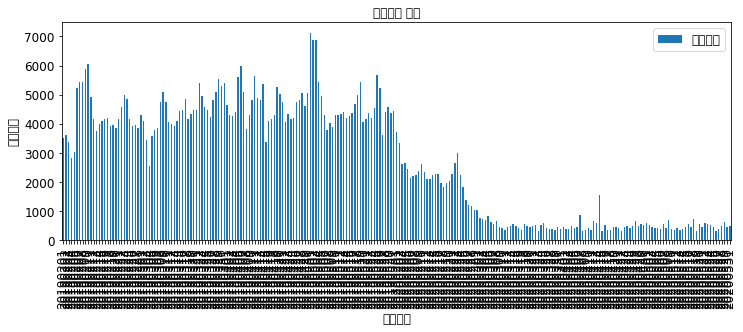

In [452]:
ax = a.plot(kind='bar', title='이용금액 변화', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('기준일자', fontsize=12)          # x축 정보 표시
ax.set_ylabel('이용금액', fontsize=12)     # y축 정보 표시
ax.legend(['이용금액'], fontsize=12) 

In [436]:
b = pd.DataFrame(text_foreigner.groupby("외국인 국가명")["이용금액"]) # 총 23개 국가
b.shape

(23, 2)

In [433]:
a = {"네덜란드":0,"대만":1,"독일":2,"러시아":3,"미국":4,"미주":5,"베트남":6,"스웨덴":7,"싱가폴":8,"아시아":9,\
     "영국" : 10,"오스트레일리아":11,"유럽":12,"일본":13,"정보없음":14,"중국":15,"중동/아프리카":16,"카자흐스탄":17\
     ,"캐나다":18,"태국":19,"프랑스":20,"필리핀":21,"홍콩":22}
text_foreigner["외국인 국가명"].replace(a,inplace=True)

In [435]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,1,2,30.0
1,20190213,260,510,40,1,2,32.0
2,20190416,260,510,40,1,2,16.0
3,20190419,260,510,42,1,3,610.0
4,20190308,260,510,10,1,7,629.0
...,...,...,...,...,...,...,...
238824,20200507,350,640,40,11,6,29.0
238825,20200512,350,612,40,11,3,15.0
238826,20200512,350,670,40,11,2,13.0
238827,20200516,350,640,71,11,1,39.0


In [311]:
text_resident = pd.read_csv("/Users/mac/Desktop/BigContest/Contest/CARD_SPENDING_RESIDENT.txt",\
                            sep = "\t")

In [437]:
text_resident.columns = ['기준일자','구코드','행정동코드','업종코드','성별코드','나이코드','이용건수','이용금액']

In [456]:
k = {range(20190201,20190301):"a",

In [455]:
text_resident

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액
0,20190201,110,517,10,1,25,11,595
1,20190201,110,517,10,1,50,5,243
2,20190201,110,517,10,1,55,5,27
3,20190201,110,517,10,0,20,11,243
4,20190201,110,517,10,0,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,0,45,19,127
2537749,20200531,350,720,81,0,50,33,211
2537750,20200531,350,720,81,0,55,9,61
2537751,20200531,350,720,81,0,60,19,194


In [439]:
a = {"F":1,"M":0}
text_resident["성별코드"].replace(a,inplace=True)

Text(0, 0.5, '이용금액')

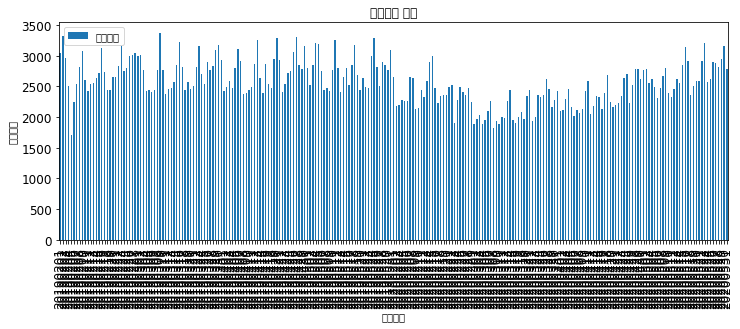

In [453]:
b = pd.DataFrame(text_resident.groupby(["기준일자"])["이용금액"].mean())
bx = b.plot(kind = 'bar',title = '이용금액 변화',figsize=(12, 4), legend=True, fontsize=12)
bx.set_xlabel('기준일자')          # x축 정보 표시
bx.set_ylabel('이용금액')     # y축 정보 표시

In [472]:
b[0:]

,이용금액
기준일자,
20190201,3049.496299
20190202,3325.264485
20190203,2956.011097
20190204,2511.145122
20190205,1707.495827
...,...
20200527,2887.480311
20200528,2820.778380
20200529,2951.582215


In [465]:
a = []
for i in range(20190201,20190531):
    a.append(i)
for j in range(20200201,20200531):
    a.append(j)

In [464]:
t = []
temp = 0
for i in range(0,len(a)):
    temp += a[i]
    if i % 15 == 0 and i != 0:
        t.append(temp)
        temp = 0
    i+=1

[323043336,
 302853360,
 302853585,
 302853810,
 302854035,
 302854260,
 302854485,
 302854710,
 302854935,
 302855160,
 302855385,
 302855610,
 302855835,
 302856060,
 302856285,
 302856510,
 302856735,
 302856960,
 302857185,
 302857410,
 302857635,
 302867530,
 303003135,
 303003360,
 303003585,
 303003810,
 303004035,
 303004260,
 303004485,
 303004710,
 303004935,
 303005160,
 303005385,
 303005610,
 303005835,
 303006060,
 303006285,
 303006510,
 303006735,
 303006960,
 303007185,
 303007410,
 303007635]